In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
create_time = pd.read_csv("../results_03_15/FAST_KNN_NO_ObjIndex_L9_search_sub_timeline_2500000_100000.csv", names=['obj_search', 'insert', 'ar']).reset_index()
create_time['name'] = 'fast'
create_time['obj_search'] = create_time['obj_search'] / 1000000
create_time['insert'] = create_time['insert'] / 1000000
create_time = create_time.melt(id_vars=['index', 'name', 'ar'], var_name='stage', value_name='time')

create_time

,index,name,ar,stage,time
0,0,fast,2.095607e+01,obj_search,9.718902
1,1,fast,1.797693e+308,obj_search,6.705504
2,2,fast,3.016183e-01,obj_search,0.278562
3,3,fast,3.928520e-01,obj_search,0.206529
4,4,fast,1.797693e+308,obj_search,0.289986
...,...,...,...,...,...
5199995,2499995,fast,2.437804e-01,insert,0.000952
5199996,2499996,fast,3.895217e+00,insert,0.001111
5199997,2499997,fast,8.129695e+00,insert,0.002993
5199998,2499998,fast,7.057998e+01,insert,0.001328


## Creation time

(0.0, 10.0)

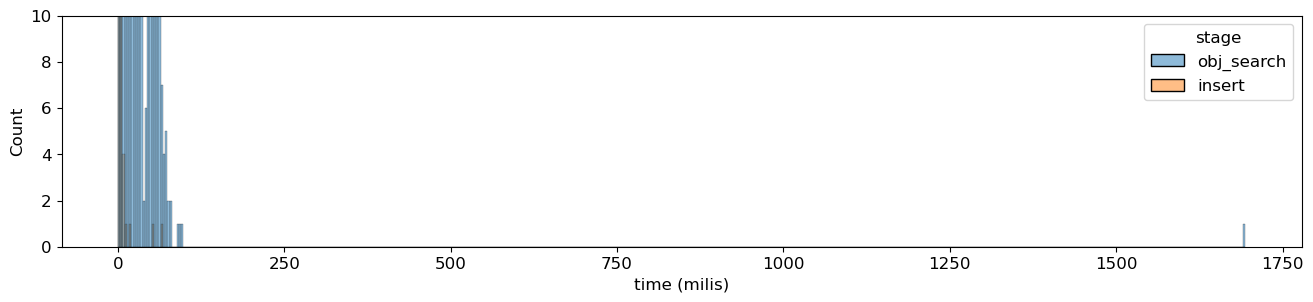

In [3]:
plt.figure(figsize=(16,3))
sns.histplot(x='time', bins=500, hue='stage', multiple='layer', data=create_time)
plt.xlabel('time (milis)')
plt.ylim(0, 10)

**Miserable queries**

Queries that takes too much time (>100 milis). 

In [4]:
miserable_queries = create_time[create_time['time'] > 50].sort_values('time', ascending=False)
miserable_queries

,index,name,ar,stage,time
115152,15152,fast,1.797693e+308,obj_search,1693.795209
40653,40653,fast,1.797693e+308,obj_search,97.968960
2547523,2447523,fast,1.797693e+308,obj_search,92.265636
2080178,1980178,fast,1.903436e+02,obj_search,91.430754
1079719,979719,fast,1.797693e+308,obj_search,79.140517
...,...,...,...,...,...
480443,380443,fast,1.767667e+02,obj_search,50.350779
1256754,1156754,fast,1.165837e+02,obj_search,50.236517
632658,532658,fast,1.797693e+308,obj_search,50.084879
1292593,1192593,fast,1.797693e+308,obj_search,50.039275


In [5]:
# step = 500000
# for i in range(0, 2500000, step):
# plt.figure(figsize=(16,3))
# sns.lineplot(x='index', y='time', hue='stage', style='stage', data=create_time)
# plt.xlabel('timestamp')
# plt.ylabel('time (milis)')

Relative time (FAST vs CkQST)

In [6]:
# relative_create = create_time[create_time['stage'] == 'insert']['time'].reset_index() - create_time[create_time['stage'] == 'obj_search']['time'].reset_index()
# relative_create
# plt.figure(figsize=(16,8))
# sns.lineplot(data=relative_create)
# plt.xlabel('timestamp')
# plt.ylabel('time (milis)')

## Load Queries

In [7]:
queries_df = pd.read_json('../../data/exported/places_o200000_q2500000_scaled.json', lines=True);
queries_df = queries_df.iloc[200000:, :].reset_index(drop=True).drop(columns=['id']).reset_index()

queries_df.tail()

,index,x,y,keywords,scaled
2499995,2499995,409.894898,103.097463,"[telephone, cellular]",True
2499996,2499996,402.284307,107.998284,[contractor],True
2499997,2499997,406.953882,110.040834,[church],True
2499998,2499998,412.621720,107.253521,"[lounge, drinking, eating, cocktail]",True
2499999,2499999,412.835319,107.262331,"[coping, plastering, tiling, pool, swimming]",True


### Properties of miserable queries

In [8]:
queries_df.shape

(2500000, 5)

In [9]:
details = queries_df.join(miserable_queries.set_index('index'), on='index').dropna().sort_values('time', ascending=False)
# details = details[details['name'] == 'fast']
details['ar'] = details['ar'].apply(lambda x: np.inf if x > 512 else x)
all = details.drop(columns=['x', 'y']).rename(columns={'time': 'insertion time (milis)'})

In [10]:
# obj_search = all[all['stage'] == 'obj_search']
# insert = all[all['stage'] == 'insert']

# insert#.join(ckqsts, rsuffix='_')
# obj_search.head(25)
all.head(25)

,index,keywords,scaled,name,ar,stage,insertion time (milis)
15152,15152,"[repairing, automobile]",True,fast,inf,obj_search,1693.795209
40653,40653,"[baker, product, mfg]",True,fast,inf,obj_search,97.968960
2447523,2447523,[church],True,fast,inf,obj_search,92.265636
1980178,1980178,"[repairing, automobile]",True,fast,190.343589,obj_search,91.430754
979719,979719,"[arts, artist]",True,fast,inf,obj_search,79.140517
2147397,2147397,[establishment],True,fast,inf,obj_search,79.079086
779318,779318,[establishment],True,fast,176.830659,obj_search,75.734434
2186165,2186165,"[automobile, detail, clean]",True,fast,inf,obj_search,74.787560
46271,46271,[operator],True,fast,inf,obj_search,73.509868
790534,790534,"[finishing, wood, refinishing]",True,fast,inf,obj_search,72.979813


### Extract Inf

In [11]:
inf_queries = obj_search[obj_search['ar'] == np.inf]

NameError: name 'obj_search' is not defined

In [ ]:
inf_queries['index'].to_csv('../../data/exported/places_o200000_q2500000_scaled.inf.csv')